In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
import pandas as pd

# Remplace ceci par le vrai chemin après avoir vérifié dans /content/drive/MyDrive/
file_path = '/content/drive/MyDrive/extrait_produits.csv'

df = pd.read_csv(file_path)

# Aperçu des premières lignes
df.head()


,id_operator,id_document,designation,item_code,ia_product,id_etablishment,conditioning_unit,quantity,unit_price_without_tax,item_discount
0,47,36027,Oignon rge 50/70 5K c1 FR,106534,oignon rouge,264,KG,5.0,1.900,0.0
1,47,36027,Tom cer rde mixte 4K c2 REG,175595,tomate cerise rouge,264,KG,4.0,6.555,0.0
2,47,36027,HF basilic sac 100g KE,195823,basilic frais,264,SAC,6.0,1.900,0.0
3,47,36027,HF basilic sac 100g KE,195823,basilic frais,264,SAC,5.0,1.900,0.0
4,47,36027,Aubergine 300/400 HVE plt 5K B&E c1 REG°,244337,aubergine entiere,264,KG,5.0,1.600,0.0


Aperçu général et qualité des données

In [4]:
# Aperçu général des types de colonnes et des valeurs manquantes
df.info()

# Pourcentage de valeurs manquantes
missing_percent = df.isna().mean().sort_values(ascending=False) * 100
print("Pourcentage de valeurs manquantes :")
print(missing_percent[missing_percent > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220495 entries, 0 to 220494
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id_operator             220495 non-null  int64  
 1   id_document             220495 non-null  int64  
 2   designation             220495 non-null  object 
 3   item_code               197312 non-null  object 
 4   ia_product              186649 non-null  object 
 5   id_etablishment         220495 non-null  int64  
 6   conditioning_unit       123612 non-null  object 
 7   quantity                220495 non-null  float64
 8   unit_price_without_tax  220495 non-null  float64
 9   item_discount           220495 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 16.8+ MB
Pourcentage de valeurs manquantes :
conditioning_unit    43.938865
ia_product           15.350008
item_code            10.514071
dtype: float64


In [5]:
# Statistiques globales
df.describe()


,id_operator,id_document,id_etablishment,quantity,unit_price_without_tax,item_discount
count,220495.000000,220495.000000,220495.000000,220495.000000,220495.000000,220495.0
mean,85.586417,87666.459489,420.360457,46.014513,46.700179,0.0
std,53.495818,19172.720207,106.214655,3513.607938,3342.879990,0.0
min,47.000000,36027.000000,264.000000,-870.000000,-7358.160000,0.0
25%,47.000000,91569.000000,274.000000,1.000000,2.700000,0.0
50%,81.000000,94493.000000,465.000000,3.566000,6.650000,0.0
75%,108.000000,97815.000000,504.000000,10.000000,13.320000,0.0
max,639.000000,103639.000000,544.000000,420446.000000,902297.672900,0.0


Analyse des variables clés

In [6]:
# Nombre de produits uniques
n_products = df['ia_product'].nunique()
print(f"Nombre de produits standardisés uniques : {n_products}")

# Produits avec plusieurs conditionnements différents
product_cond_counts = df.groupby('ia_product')['conditioning_unit'].nunique()
products_multi_cond = product_cond_counts[product_cond_counts > 1]
print(f"Produits avec plusieurs conditionnements : {len(products_multi_cond)}")




Nombre de produits standardisés uniques : 7169
Produits avec plusieurs conditionnements : 2095


In [7]:
# Seuils des 99e percentiles
price_thresh = df['unit_price_without_tax'].quantile(0.99)
quantity_thresh = df['quantity'].quantile(0.99)

# j'affiche les 10 premires lignes qui ont des valeurs abérantes
df[df['unit_price_without_tax'] > price_thresh].sort_values(by='unit_price_without_tax', ascending=False).head(10)
df[df['quantity'] > quantity_thresh].sort_values(by='quantity', ascending=False).head(10)



,id_operator,id_document,designation,item_code,ia_product,id_etablishment,conditioning_unit,quantity,unit_price_without_tax,item_discount
141780,81,97065,"1 LAIT CONCENTRE RICHARDX200 COUPELLE 7,5G",01,lait entier uht,461,NaN,420446.0,12.85,0.0
101604,108,94990,18 CAFE RESERVE RICHARD 1kg GRS,24,cafe grain,497,NaN,400705.0,11.90,0.0
103168,108,95107,12 CAFE RESERVE RICHARD 1kg GRS,24,cafe grain,497,NaN,400705.0,11.90,0.0
101110,108,94949,6 CAFE RESERVE RICHARD 1kg GRS,24,cafe grain,497,NaN,400705.0,11.90,0.0
115906,81,95525,6 CAFE CREMA D'ORO 1kg GRS,807991,cafe grain,461,NaN,400091.0,15.12,0.0
116865,81,95295,6 CAFE CREMA D'ORO 1kg GRS,808122,NaN,461,NaN,400091.0,15.12,0.0
118526,81,95811,12 CAFE CREMA D'ORO 1kg GRS,808205,cafe grain,461,NaN,400091.0,15.12,0.0
105410,81,95295,6 CAFE CREMA D'ORO 1kg GRS,808122,cafe grain,461,NaN,400091.0,15.12,0.0
141776,81,97065,12 CAFE CREMA D'ORO 1kg GRS,808367,cafe grain,461,NaN,400091.0,15.12,0.0
159003,81,98147,6 CAFE CREMA D'ORO 1kg GRS,808542,cafe grain,461,NaN,400091.0,16.00,0.0


proposition de nettoyage

In [8]:
# Supprimer les lignes avec des prix ou quantités négatifs
df_cleaned = df[(df['unit_price_without_tax'] >= 0) & (df['quantity'] >= 0)]

# Supprimer les outliers extrêmes (ex: au-dessus du 99e percentile)
price_upper = df_cleaned['unit_price_without_tax'].quantile(0.99)
quantity_upper = df_cleaned['quantity'].quantile(0.99)

df_cleaned = df_cleaned[(df_cleaned['unit_price_without_tax'] <= price_upper) &
                        (df_cleaned['quantity'] <= quantity_upper)]

print(f"Forme initiale : {df.shape}")
print(f"Après nettoyage : {df_cleaned.shape}")


Forme initiale : (220495, 10)
Après nettoyage : (207700, 10)


In [9]:
# 🟩 Étape 1 : Afficher le % de NaN dans conditioning_unit avant imputation
missing_before = df_cleaned['conditioning_unit'].isna().mean() * 100
print(f"❗ Pourcentage de valeurs manquantes dans 'conditioning_unit' AVANT imputation : {missing_before:.2f}%")

# 🟩 Étape 2 : Trouver le conditionnement le plus fréquent pour chaque ia_product
conditioning_fill = (
    df_cleaned.groupby('ia_product')['conditioning_unit']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
)

# 🟩 Étape 3 : Remplacer les valeurs manquantes en utilisant la valeur la plus fréquente
df_cleaned['conditioning_unit'] = df_cleaned.apply(
    lambda row: conditioning_fill[row['ia_product']]
    if pd.isna(row['conditioning_unit']) and row['ia_product'] in conditioning_fill
    else row['conditioning_unit'],
    axis=1
)

# 🟩 Étape 4 : Afficher le % de NaN après imputation
missing_after = df_cleaned['conditioning_unit'].isna().mean() * 100
print(f"✅ Pourcentage de valeurs manquantes dans 'conditioning_unit' APRÈS imputation : {missing_after:.2f}%")



❗ Pourcentage de valeurs manquantes dans 'conditioning_unit' AVANT imputation : 42.02%
✅ Pourcentage de valeurs manquantes dans 'conditioning_unit' APRÈS imputation : 14.41%


Il nous reste maintenant 14% de naan de la variable clé conditioning_unit soit 86% de données complètes. Ces données sont largement suffisantes pour établir des patterns robustes par produit.


In [10]:
# on va donc filtrer les 14% pour ne travailler que sur les 86%
df_valid = df_cleaned.dropna(subset=['conditioning_unit'])


In [11]:
#on verifie qu'il n'y a pas de bias : les lignes avec NaN ne sont pas systématiquement liées à un fournisseur, à un type de produit ou à une gamme spécifique
df_cleaned[df_cleaned['conditioning_unit'].isna()]['ia_product'].value_counts().head()


,count
ia_product,
paton pizza,1079
oeuf mollet mousse courge,407
epaule sans os,325
cotisation securite sociale,251
ris veau coeur,198


**II. Methodologie**

nous allons maintenant identifier les produits qui ont le même ia_product mais pas le meme conditioning_unit et afficher la variation de prix entre ces produits

In [12]:
# Compter le nombre de conditionnements différents par ia_product
product_cond_counts = df_cleaned.groupby('ia_product')['conditioning_unit'].nunique()

# Garder uniquement les produits avec plusieurs conditionnements
products_multi_cond = product_cond_counts[product_cond_counts > 1].index

# Filtrer le DataFrame
df_multi_cond = df_cleaned[df_cleaned['ia_product'].isin(products_multi_cond)]


In [13]:
# Moyenne des prix par produit et conditionnement
grouped = (
    df_multi_cond.groupby(['ia_product', 'conditioning_unit'])['unit_price_without_tax']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'avg_unit_price', 'count': 'n_observations'})
)


In [14]:
# Regrouper à nouveau pour calculer min et max du prix par produit
price_range = (
    grouped.groupby('ia_product')['avg_unit_price']
    .agg(['min', 'max'])
    .assign(variation_abs=lambda x: x['max'] - x['min'],
            variation_pct=lambda x: 100 * (x['max'] - x['min']) / x['min'])
    .reset_index()
)


In [15]:
# Trier par variation en pourcentage
price_range_sorted = price_range.sort_values(by='variation_pct', ascending=False)

price_range_sorted = price_range_sorted[
    (price_range_sorted['variation_abs'] != 0) &
    (price_range_sorted['variation_abs'] != price_range_sorted['max'])
]

# Afficher les 10 produits avec les plus fortes variations
price_range_sorted.head(10)


,ia_product,min,max,variation_abs,variation_pct
560,duchesse anne biere,0.000013,3.483758,3.483746,2.786997e+07
1661,sac sous vide,0.001000,59.265000,59.264000,5.926400e+06
462,couteaux huitre,0.012800,13.540730,13.527930,1.056870e+05
1252,oeuf frais moyen,0.180130,65.114271,64.934141,3.604849e+04
335,chocolat blanc 28,0.200000,71.680000,71.480000,3.574000e+04
1744,sauce vinaigrette balsamique,0.195750,64.850000,64.654250,3.302899e+04
1251,oeuf frais gros,0.200000,65.000000,64.800000,3.240000e+04
518,cuillere bois,0.012200,3.526042,3.513842,2.880198e+04
1292,paille papier,0.039000,9.734000,9.695000,2.485897e+04
1651,sac pain,0.100000,23.500000,23.400000,2.340000e+04


Les produits de ce tableau ont le meme ia_product mais des conditioning différents. les variations de prix sont donc causées par le conditionnment

In [16]:
# on s'interesse maintenant aux variations de prix quand le conditionnment est le même ce qui peut être du au fournisseur

# Calculer les statistiques de prix par combinaison produit + conditionnement
price_variation_same_cond = (
    df_cleaned.groupby(['ia_product', 'conditioning_unit'])['unit_price_without_tax']
    .agg(['min', 'max', 'mean', 'std', 'count'])
    .reset_index()
)

# Ajouter une colonne variation absolue et variation en %
price_variation_same_cond['variation_abs'] = price_variation_same_cond['max'] - price_variation_same_cond['min']
price_variation_same_cond['variation_pct'] = 100 * price_variation_same_cond['variation_abs'] / price_variation_same_cond['min']


In [17]:
# Filtrer pour ne garder que les cas où les prix varient (min != max)
price_variation_diff = price_variation_same_cond[
    price_variation_same_cond['variation_abs'] > 0
]


In [18]:
# Trier par variation en % décroissante
price_variation_diff_sorted = price_variation_diff.sort_values(by='variation_pct', ascending=False)
price_variation_diff_sorted = price_variation_diff_sorted[
    (price_variation_diff_sorted['min'] != 0) &
    (price_variation_diff_sorted['variation_abs'] != 0)
]

# Afficher les 10 premières lignes
price_variation_diff_sorted.head(10)


,ia_product,conditioning_unit,min,max,mean,std,count,variation_abs,variation_pct
2945,detergent,BID,0.0025,76.82,41.569185,24.582750,27,76.8175,3.072700e+06
2861,cvo inaporc,K,0.0040,40.00,0.673969,4.968364,65,39.9960,9.999000e+05
8413,redevance,VACHE,0.0017,14.12,0.195101,1.652422,73,14.1183,8.304882e+05
4938,interbev bovin,KG,0.0020,16.22,0.833964,1.869524,111,16.2180,8.109000e+05
1250,caissette patissiere,U,0.0090,61.14,19.925238,11.987318,53,61.1310,6.792333e+05
2476,couvercle sauce pot 6,PCE,0.0091,55.92,7.640767,9.903711,51,55.9109,6.144055e+05
9832,spritz red,KG,0.0020,10.88,2.478333,4.105528,24,10.8780,5.439000e+05
7709,pochette frite carton 140,SHT,0.0010,5.30,3.545500,1.813437,6,5.2990,5.299000e+05
10464,vache qui rit,KG,0.0017,8.50,1.935282,3.341943,11,8.4983,4.999000e+05
6180,mini roule abricot,TUBO,0.0184,62.53,15.463163,13.571735,65,62.5116,3.397370e+05


Nous avons ici les produits dont le prix varie avec les mêmes conditionnements. ces variations sont donc dues aux fournisseurs. Ci-dessus sont affichés les produits avec les plus fortes variations. certaines peuvent paraitre abérantes et nécessiterait un nettoyage plus approndie  

<ipython-input-35-62ad970752d3>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['conditioning_unit_simplified'] = df_valid['conditioning_unit'].apply(simplify_unit)
<ipython-input-35-62ad970752d3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['unit_final'] = df_valid['conditioning_unit_simplified'].apply(lambda x: x if x in top_units else 'other')
<ipython-input-35-62ad970752d3>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

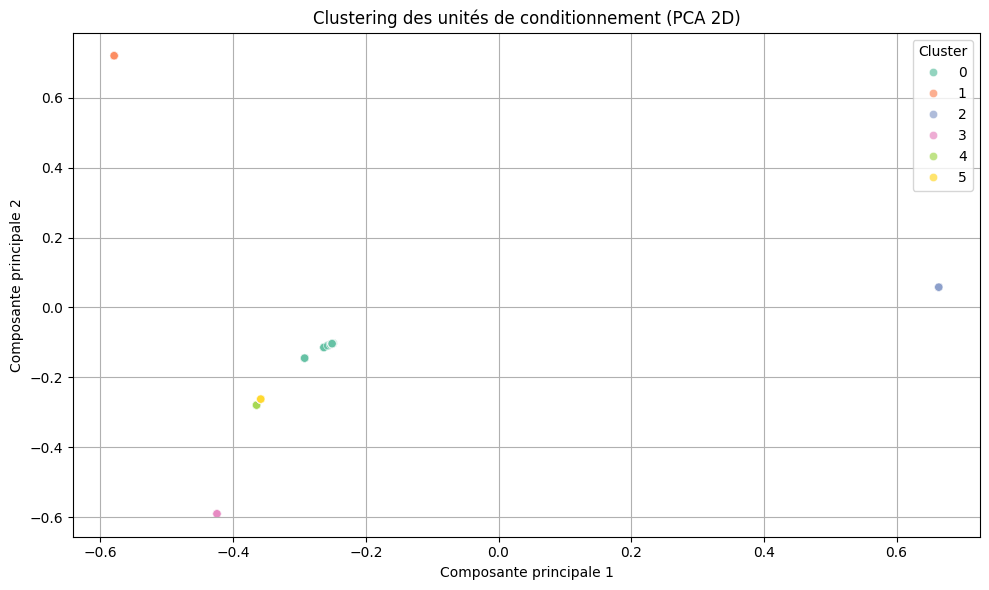

In [35]:
#Question bonus : modèle de machine learning

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Étape 1 : Nettoyage et regroupement des unités similaires
def simplify_unit(unit):
    unit = str(unit).strip().lower()
    if unit in ['kg', 'k', 'kilogramme', 'kilo', 'kg~']:
        return 'kg'
    elif unit in ['g', 'gramme']:
        return 'g'
    elif unit in ['l', 'litre']:
        return 'l'
    elif unit in ['cl']:
        return 'cl'
    elif unit in ['ml']:
        return 'ml'
    elif unit in ['btl', 'bt', 'bot']:
        return 'bottle'
    elif unit in ['u', 'unt', 'unite', 'pce', 'pu', 'pc']:
        return 'unit'
    elif unit in ['col', 'bqt', 'bte', 'sac']:
        return 'package'
    else:
        return unit

df_valid['conditioning_unit_simplified'] = df_valid['conditioning_unit'].apply(simplify_unit)

# Étape 2 : Limiter à 20 unités les plus fréquentes, les autres deviennent "other"
top_units = df_valid['conditioning_unit_simplified'].value_counts().nlargest(20).index
df_valid['unit_final'] = df_valid['conditioning_unit_simplified'].apply(lambda x: x if x in top_units else 'other')

# Étape 3 : One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(df_valid[['unit_final']])

# Étape 4 : Clustering avec KMeans
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df_valid['cluster'] = kmeans.fit_predict(X_encoded)

# Étape 5 : Réduction de dimension pour visualisation (PCA)
pca = PCA(n_components=2)
components = pca.fit_transform(X_encoded)
df_valid['pca_1'] = components[:, 0]
df_valid['pca_2'] = components[:, 1]

# Étape 6 : Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_valid, x='pca_1', y='pca_2', hue='cluster', palette='Set2', alpha=0.7)
plt.title("Clustering des unités de conditionnement (PCA 2D)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


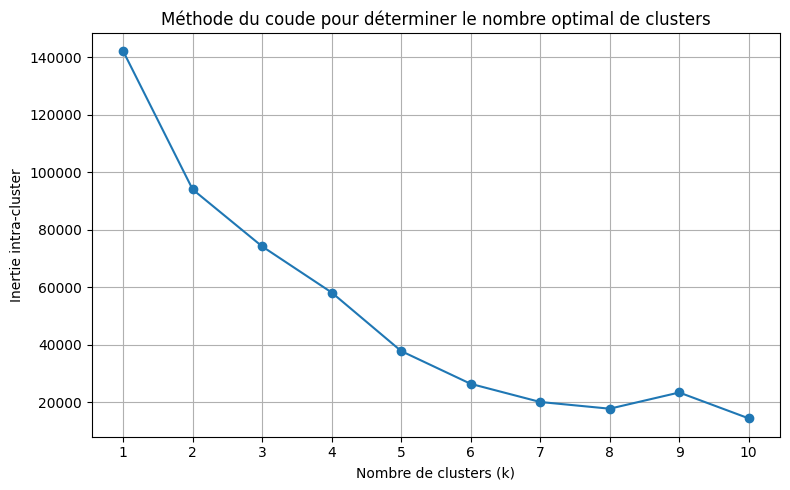

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculer l'inertie pour différents nombres de clusters
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_encoded)
    inertias.append(kmeans.inertia_)

# Afficher la courbe
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title("Méthode du coude pour déterminer le nombre optimal de clusters")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie intra-cluster")
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()
# selon la représentation visuelle, le bon nombre de cluster semble être 6

In [36]:
# Tableau croisé entre clusters et types d'unités
cluster_summary = pd.crosstab(df_valid['cluster'], df_valid['unit_final'])

# Ajouter une colonne de total par cluster pour voir la taille des groupes
cluster_summary['total'] = cluster_summary.sum(axis=1)

# Trier les clusters par taille décroissante (facultatif)
cluster_summary = cluster_summary.sort_values(by='total', ascending=False)

# Affichage
cluster_summary

#ce tableau permet de comprendre de quoi se composent nos 6 clusters

unit_final,1,bac,bid,boi,bottle,cart,cl,crn,kg,l,...,package,paq,pet,pi,piece,sch,sht,un,unit,total
cluster,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,67160,0,...,0,0,0,0,0,0,0,0,0,67160
0,873,959,1279,933,0,1363,1595,1719,0,7961,...,0,1206,1216,2411,1644,991,1181,1115,0,29877
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28326
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,20754,20754
4,0,0,0,0,16120,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16120
5,0,0,0,0,0,0,0,0,0,0,...,15543,0,0,0,0,0,0,0,0,15543


### Conclusion sur le modèle de clustering

Nous avons utilisé l'algorithme de clustering KMeans pour regrouper automatiquement les produits selon leur `conditioning_unit`. Après un nettoyage des formats et un encodage One-Hot, nous avons appliqué une réduction de dimension (PCA) pour visualiser les groupes.

Le modèle a permis d'identifier 6 grands types de conditionnements, principalement organisés par nature (poids, bouteille, unité, emballage, autre et liquide).Néanmoins, nous remarquons tout de même que le cluster 0 est un peu confus avec un mélange de liquide et d'autre conditionnement. A améliorer par la suite. Ce regroupement automatique peut servir de base pour :
- analyser les variations de prix par groupe,
- homogénéiser les catégories produits dans les bases clients,
- détecter des incohérences de tarification ou de saisie.

